In [167]:
# admission data set 
# supervised learning - have both x and y value

### Problem Statement
- ### The goal here is to find the chance of admission of a candidate based on his/her GRE score, TOEFL score, rating of the university in which he/she is trying to get admission,strength of the SOP,Strength of the letter of the recommendation, CGPA and the research experience

In [168]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from joblib import dump
%matplotlib inline

In [169]:
df=pd.read_csv("Admission_Prediction.csv")  # importing the data set

In [170]:
df.drop('Serial No.', axis=1, inplace=True)


In [171]:
df['GRE Score'].fillna(df['GRE Score'].mode()[0],inplace=True)
df['TOEFL Score'].fillna(df['TOEFL Score'].mode()[0],inplace=True)
df['University Rating'].fillna(df['University Rating'].mean(),inplace=True)

In [172]:
df_university = df.groupby(by='University Rating').mean()
df_university

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
4.3,317.0,110.0,3.000000,3.000000,8.88,0.0,0.000000
15.0,317.0,110.0,3.000000,3.000000,8.88,0.0,0.000000
16.0,317.0,110.0,3.000000,3.000000,8.88,0.0,0.000000
20.0,317.0,110.0,3.000000,3.000000,8.88,0.0,1.000000
47.0,317.0,110.0,3.000000,3.000000,8.88,0.0,1.000000
63.6,313.0,104.0,3.000000,3.000000,7.95,0.5,0.500000
82.3,292.0,87.0,1.333333,1.333333,7.90,0.0,0.333333
99.0,293.0,92.0,1.000000,1.000000,6.00,0.0,1.000000


In [173]:
x=df.drop(['Chance of Admit'],axis=1)
y=df['Chance of Admit']
# here we are droping the Chance of Admit and serial no, as they are not going to be used for the features 
# Chance of Admit is the target column which shows the probalility of admission for a candidate.

In [174]:
x.head() # checking the transformed feature column

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,317,110,47.0,3,3,8.88,0
1,317,110,16.0,3,3,8.88,0
2,317,110,4.3,3,3,8.88,0
3,317,110,20.0,3,3,8.88,0
4,317,110,15.0,3,3,8.88,0


In [175]:
x = np.array(x)
y = np.array(y)
y = y.reshape(-1,1)
y.shape

(13, 1)

In [176]:
# to be only used if you want to scale the data,standize the data,if the variation is huge in the dataset
# when we have huge variation in the data set
# i am not changing the data , i am changing the scale only like taking logs, sqrt--not changing the actual meaning of the data set
# variance betweeen the dataset become very low
# machine will understand in better way this data  as having low variance in the data set

from sklearn.preprocessing import StandardScaler
scaler_feature=StandardScaler()
scaler_lablel=StandardScaler()
scaled_data=scaler_feature.fit_transform(x)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)
scaled_data

array([[ 0.72160259,  0.84953403, -0.23756347,  0.63900965,  0.57932412,
         0.91750027, -0.42640143],
       [ 0.72160259,  0.84953403, -1.28273898,  0.63900965,  0.57932412,
         0.91750027, -0.42640143],
       [ 0.72160259,  0.84953403, -1.67720845,  0.63900965,  0.57932412,
         0.91750027, -0.42640143],
       [ 0.72160259,  0.84953403, -1.14787763,  0.63900965,  0.57932412,
         0.91750027, -0.42640143],
       [ 0.72160259,  0.84953403, -1.31645432,  0.63900965,  0.57932412,
         0.91750027, -0.42640143],
       [-1.2361366 , -0.94137554,  1.51563417, -1.73445477, -1.57245119,
        -2.68325551, -0.42640143],
       [-1.480854  , -1.14036549,  0.95258801, -0.54772256, -0.49656353,
        -0.80786187, -0.42640143],
       [-0.74670181, -1.14036549,  0.95258801, -1.73445477, -1.57245119,
         0.31737431, -0.42640143],
       [-1.7255714 , -2.03582028,  0.95258801, -1.73445477, -1.57245119,
        -0.43278315, -0.42640143],
       [ 1.61889971,  0.8495

In [177]:
#splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.33,random_state=100)
# finding mi c1 , m2 c2,..... 

In [178]:
# fitting the data to the linear regression model
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
reg=linear_model.LinearRegression()
reg.fit(train_x,train_y)

LinearRegression()

In [179]:
# calc the accuracy of the model
from sklearn.metrics import r2_score
score=r2_score(reg.predict(test_x),test_y)
score

-1.73297733146206

                   coefficient
GRE Score             0.067087
TOEFL Score          -0.192818
University Rating     0.041856
SOP                   1.907994
LOR                   0.937924
CGPA                  1.550530
Research             -4.808803
Feature: 0, Score: 0.06709
Feature: 1, Score: -0.19282
Feature: 2, Score: 0.04186
Feature: 3, Score: 1.90799
Feature: 4, Score: 0.93792
Feature: 5, Score: 1.55053
Feature: 6, Score: -4.80880


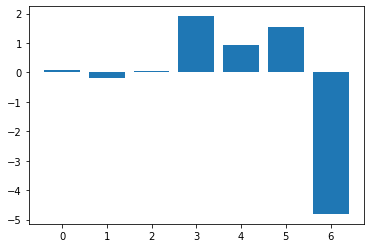

In [180]:
intercept = reg.intercept_
dfx = df.drop('Chance of Admit' , axis=1)
importance = reg.coef_[0]
features = pd.DataFrame(importance, dfx.columns, columns=['coefficient'])
print(features)
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# changing the hyper parameters

In [181]:
#splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.20,random_state=100)
# finding mi c1 , m2 c2,..... 

In [182]:
# fitting the data to the linear regression model
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
reg=linear_model.LinearRegression()
reg.fit(train_x,train_y)

LinearRegression()

In [183]:
# calc the accuracy of the model
from sklearn.metrics import r2_score
score=r2_score(reg.predict(test_x),test_y)
score

-0.6228417372192021

In [184]:
import tensorflow as tf
from tensorflow import keras
#tf.keras.layers.Dense
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
#opt = keras.optimizers.Adam(learning_rate=0.01)


In [185]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 7))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mean_squared_error', optimizer = 'adam')
ANN_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 50)                400       
                                                                 
 activation_8 (Activation)   (None, 50)                0         
                                                                 
 dense_11 (Dense)            (None, 150)               7650      
                                                                 
 activation_9 (Activation)   (None, 150)               0         
                                                                 
 dropout_4 (Dropout)         (None, 150)               0         
                                                                 
 dense_12 (Dense)            (None, 150)               22650     
                                                                 
 activation_10 (Activation)  (None, 150)              

In [186]:
ANN_model.compile(optimizer='adam', loss='mean_squared_error')

In [187]:
epochs_hist = ANN_model.fit(train_x, train_y, epochs = 100, batch_size = 20, validation_split = 0.2)

Epoch 1/100
1/1 [==============================] - 0s 439ms/step - loss: 20566.1758 - val_loss: 3276.7261
Epoch 2/100
1/1 [==============================] - 0s 22ms/step - loss: 4361.5605 - val_loss: 298.1827
Epoch 3/100
1/1 [==============================] - 0s 21ms/step - loss: 6347.8945 - val_loss: 129.6994
Epoch 4/100
1/1 [==============================] - 0s 23ms/step - loss: 2421.6108 - val_loss: 775.7292
Epoch 5/100
1/1 [==============================] - 0s 21ms/step - loss: 1841.1088 - val_loss: 1293.1521
Epoch 6/100
1/1 [==============================] - 0s 20ms/step - loss: 4689.5596 - val_loss: 1249.2373
Epoch 7/100
1/1 [==============================] - 0s 21ms/step - loss: 4482.5757 - val_loss: 837.3429
Epoch 8/100
1/1 [==============================] - 0s 20ms/step - loss: 2066.7158 - val_loss: 435.4745
Epoch 9/100
1/1 [==============================] - 0s 21ms/step - loss: 3272.9849 - val_loss: 166.2167
Epoch 10/100
1/1 [==============================] - 0s 21ms/step - l

In [188]:
result = ANN_model.evaluate(test_x, test_y)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

1/1 [==============================] - 0s 19ms/step - loss: 3.0037
Accuracy : -2.0037124156951904


In [189]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

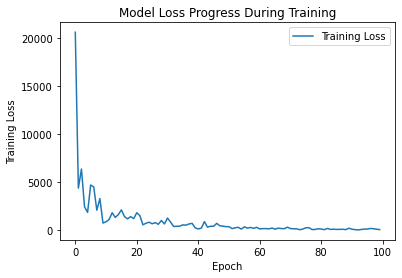

In [190]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

TRAIN AND EVALUATE A DECISION TREE AND RANDOM FOREST MODELS

In [191]:
# Decision tree builds regression or classification models in the form of a tree structure. 
# Decision tree breaks down a dataset into smaller subsets while at the same time an associated decision tree is incrementally developed. 
# The final result is a tree with decision nodes and leaf nodes.


from sklearn.tree import DecisionTreeRegressor
decisionTree_model = DecisionTreeRegressor()
decisionTree_model.fit(train_x, train_y)

DecisionTreeRegressor()

                   coefficient
GRE Score             0.208333
TOEFL Score           0.000000
University Rating     0.416667
SOP                   0.000000
LOR                   0.000000
CGPA                  0.375000
Research              0.000000
Feature: 0, Score: 0.20833
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.41667
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.37500
Feature: 6, Score: 0.00000


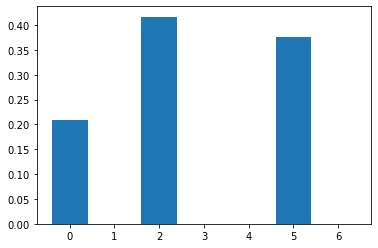

In [192]:
#feature Importancce testing
dfx = df.drop('Chance of Admit' , axis=1)
importance = decisionTree_model.feature_importances_
features = pd.DataFrame(importance, dfx.columns, columns=['coefficient'])
print(features)
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [193]:
accuracy_decisionTree = decisionTree_model.score(test_x, test_y)
accuracy_decisionTree

-0.4999999999999998

In [194]:
# Many decision Trees make up a random forest model which is an ensemble model. 
# Predictions made by each decision tree are averaged to get the prediction of random forest model.
# A random forest regressor fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 


In [195]:
from sklearn.ensemble import RandomForestRegressor
randomForest_model = RandomForestRegressor(n_estimators=100, max_depth=10)
randomForest_model.fit(train_x, train_y)
accuracy_randomforest = randomForest_model.score(test_x, test_y)
accuracy_randomforest

C:\Users\mrhus\AppData\Local\Temp/ipykernel_5988/2085754441.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(train_x, train_y)


-0.08059999999999978

                   coefficient
GRE Score             0.134825
TOEFL Score           0.064829
University Rating     0.390154
SOP                   0.002857
LOR                   0.047491
CGPA                  0.350955
Research              0.008889
Feature: 0, Score: 0.13482
Feature: 1, Score: 0.06483
Feature: 2, Score: 0.39015
Feature: 3, Score: 0.00286
Feature: 4, Score: 0.04749
Feature: 5, Score: 0.35096
Feature: 6, Score: 0.00889


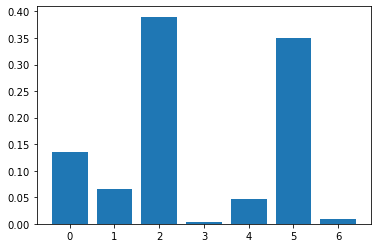

In [196]:
#feature Importancce testing
dfx = df.drop('Chance of Admit' , axis=1)
importance = randomForest_model.feature_importances_
features = pd.DataFrame(importance, dfx.columns, columns=['coefficient'])
print(features)
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

UNDERSTAND VARIOUS REGRESSION KPIs

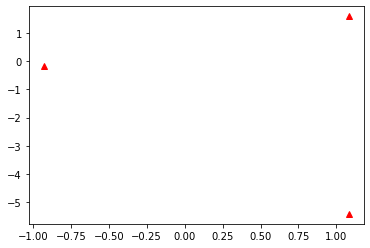

In [197]:
y_pred = reg.predict(test_x)
plt.plot(test_y, y_pred, '^', color='r')

In [198]:
y_predict_orig = scaler_y.inverse_transform(y_pred)
y_test_orig = scaler_y.inverse_transform(test_y)

In [199]:
k = test_x.shape[1]
n = len(test_x)
n

3

In [200]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 1.886 
MSE = 3.5583859841003487 
MAE = 1.2849797734220514 
R2 = -15.012736928451567 
Adjusted R2 = 7.405094771380627


# saving the model to the local file system

- pickle library- used to convert object into bytecode - called serialization
- deserialization- converting bytecode to object

In [201]:
#filename='finalized_model.pickle'
#pickle.dump(reg,open(filename,'wb'))
dump(randomForest_model, 'filename.joblib')

['filename.joblib']

In [202]:
s = np.array([340, 120, 5, 5, 5, 9.6, 1])
print(s.shape)
s = s.reshape(1,-1)
print(s.shape)

(7,)
(1, 7)
